Si estas en Google Colab, ejecutá esta celda de abajo. Si clonaste el repositorio con git o lo descargaste y corres localmente, ignorá esta primer celda.

In [ ]:
!mkdir library
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/library/utils.py
!mv utils.py library/utils.py

***

In [3]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import sqrt
from matplotlib import pylab as plt

# Importamos un módulo nuestro
from library import utils

# *Aleatoreidad y probabilidad*

La aleatoredidad es un concepto central de la teoría de probabilidad. En general, la aleatoredidad viene asociada con la incetidumbre, que puede surgir por los errores de los datos o por los tamaños finitos de las muestras.

En la computadora, la aleatoreidad se simula usando como base un [generador de números pseudo aleatorios](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (GNPA). Un GNPA genera una serie de números cuyas propiedades son similares a las de una serie de números aleatorios.

En <tt>python</tt> muchas de las funciones relacionadas están implementadas en el módulo `random`, pero una implementación más práctica aparece en el paquete `numpy`

In [ ]:
# Importamos el paquete random de numpy
from numpy import random

In [ ]:
# Generamos un número al azar en el intervalo [0.0, 1.0)
x = random.rand()
print(x)

Fíjense que si corren la celda de arriba muchas veces, el resultado obtenido es diferente, pero siempre un número entre 0 y 1. Pero en realidad, los GNPA utilizan algoritmos, cuyas propiedades estás perfectamente definidas por el valor inicial (la semilla, o <em>seed</em>). Por lo tanto, no son realmente aleatorios. En los viejos tiempos, en <tt>python</tt>, el <em>seed</em> podía definirse simplemente con la función homónima.

In [ ]:
random.seed(1234)
print(random.rand())
random.seed(1234)
print(random.rand())

Una característica práctica de la implementación en <tt>numpy</tt> es que se puede generar <tt>arrays</tt> de números aleatorios, pasándole el tamaño en cada dimensión. El jueves vamos a ver más detalle de las características de los <tt>arrays</tt> de <tt>numpy</tt>.

In [ ]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Y por supuesto, si vuelvo a la misma semilla, los resultado son idénticos.

In [ ]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Como se puede ver arriba, para una semilla dada, la serie de números generada es idéntica. En la actualidad, fijar el <em>seed</em> de la manera que aparece arriba se considera mala práctica, y la sugerencia es hacer lo siguiente:

In [ ]:
from numpy.random import RandomState, SeedSequence
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))
# Later, you want to restart the stream
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))

De esta manera, se puede tener generadores independientes, inicializados de manera diferente, cosa que no podía hacerse antes.

*** 

Ahora vamos a intentar visualizar una muestra de una distribución uniforme. Generamos una muestra de 100 elementos de vectores en dos dimenciones, en la región -1 < x < 1; -1 < y < 1

In [ ]:
import matplotlib.patches as patches

# Genaramos la muestra
sample = random.rand(100, 2)

# Como queremos que la muestra esté entre -1 y 1 en ambas dimensiones, tenemos que multiplicar por 2 y restar 1.
sample = sample * 2 - 1

# Imprimimos la forma de la muestra y la representamos en un plano.
print(sample.shape)
l0, = plt.plot(sample[:, 0], sample[:, 1], '.')

# Para que sea más bonito, ponemos los ejes del mismo tamaño y le agregamos lineas verticales y horizontales
ax = plt.gca()
ax.set_aspect('equal')
ax.axvline(0, color='0.5', zorder=-1)
ax.axhline(0, color='0.5', zorder=-1)

def axis_on_center(ax):
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Corro los labels
    ax.xaxis.set_label_position('top') 
    ax.yaxis.set_label_position('right') 
    return 

axis_on_center(ax)
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.set_xlabel(u'$\\theta_0$', fontsize=16)
ax.set_ylabel(u'$\\theta_1$', fontsize=16, rotation='horizontal')

# Agrego cuadradito
rect = patches.Rectangle(xy=(-1.0, -1.0), width=2.0, height=2.0, facecolor='None', 
                         edgecolor='r', lw='0.5')
ax.add_patch(rect)

plt.show()

Vamos a contar ahora cuantos de los elementos de la muestra caen en el cuadrante superior derecho, y veamos a qué fracción del total corresponde. Pero antes, <b>¿qué valor esperamos? ¿por qué?</b>

In [ ]:
# Escribimos la condición de pertenencia al cuadrante de interés
cond = (sample[:, 0] > 0) * (sample[:, 1] > 0)

# Veamos la pinta que tiene cond
print(cond)

In [ ]:
# Sumar los elementos de cond nos dice en cuantos casos la condición se satisface
n_ad = np.sum(cond)
print('Hay {} elementos en el cuadrante superior derecho.'.format(n_ad))

# Calculo la fracción a la que correponde
f_ad = n_ad / len(sample)
print('La fracción de elementos en el cuadrante superior derecho es {}.'.format(f_ad))

Como es de esperar, la fracción se aproxima a 1/4. Pero, <b>¿cuán cerca de 0.25 tenemos que tiene que estar el número obtenido para que nos quedemos contentos? ¿y cómo cambia esto con el tamaño de la muestra?</b>

## Incertezas

Para responder a esas preguntas, por un lado tenemos que definir algún concepto de incerteza de f_ad. Ya veremos que la variable f_ad sigue una distribución Poissoneana, cuyo desvio estándar (ya lo definiremos bien, pero podemos pensarlo como un error), es $\sqrt{n_{AD}}/N$, donde $N$ es el tamaño de la muestra. Entonces

In [ ]:
sd_f = sqrt(n_ad)/len(sample)

print('El error de f_ur es {}'.format(sd_f))
print('La fracción es entonces {:.3f} \pm {:.3f}'.format(f_ad, sd_f))

Vemos, entonces que la fracción es perfectamente compatible con el valor esperado 1/4. 

***
### Preguntas

<ul>
    <li>Si tuviéramos solo esta medición (es decir, la fracción de elementos de la muestra que cae en el cuadrante superior derecho), pero si no conociéramos la forma en la que la muestra fue generada, ¿podríamos decir que la distribución es uniforme en la región de $\mathbb{R}ˆ2$ tal que $-1 < x < 1$ y $-1 < y < 1$? </li>
    <li> A la inversa, si el número fuera, por ejemplo $0.245 \pm 0.001$, ¿qué podríamos decir del proceso de generación de la muestra?
    </ul>    
    
***

## Tamaño de la muestra

Estudiemos ahora cómo cambia nuestra precisión con el tamaño de la muestra. Para eso, escribamos una pequeña función que genere una muestra, y que calcule la fracción de elementos que caen en el cuadrante superior derecho y su incerteza. La función tiene un solo argumento: el tamaño de la muestra.

Para escribirla, hay que ir recolectando las líneas relevantes de los celdas de arriba (Consejo: usar <tt>random.rand</tt> para generar la muestra). Borrar el comando <tt>pass</tt> y a codear!

In [ ]:
import numpy as np

def fraccion_ad(n, seed=None):
    """
    :param int n: Tamaño de la muestra
    
    :returns: fracción de la muestra en el cuadrante superior derecho e incerteza de esta fracción
    :rtype: float, float
    """
    # Fijar la semilla
    if seed is not None:
        np.random.seed(seed)
        
    # Crear la muestra.    
    pass

    return


Ahora vamos a testear la función usando el paquete utils que está en el repositorio. Después los invitamos a chusmearlo.

In [ ]:
utils.test_fraccion(fraccion_ad)

Ahora calculemos la fracción para diferentes tamaños de la muestra, y guardemos todo en unas listas, para plotearlas después. <em>NB: el jueves veremos con más detalle cómo funcionan las listas, arreglos, etc.</em>

In [ ]:
# Crea dos listas vacías
f = []
sd = []

# Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
# Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
sizes = 2**np.arange(4, 14)

# Iteramos en los tamaños (usamos siempre el mismo seed?)
for size in sizes:
    output = fraccion_ad(size)
    f.append(output[0])
    sd.append(output[1])
    
# Veamos que obtuvimos
for i in range(len(f)):
    print('{}, {}'.format(f[i], sd[i]))

Y ahora el momento del plot

In [ ]:
plt.errorbar(sizes, f, sd, fmt='.')

# Para que sea más legible, hacemos el eje x logarítmico
ax = plt.gca()
ax.set_xscale('log')
ax.axhline(0.25, color='0.5', zorder=-1)

ax.set_xlabel('Tamaño de la muestra', fontsize=16)
ax.set_ylabel('Fracción en AD', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

***

### Preguntas

<ul>
    <li> Sí repetimos el experimento, ¿cómo va a cambiar el plot de arriba?</li>
    <li> ¿En qué fracción de los casos veremos puntos cuyas barras de error no tocan 0.25?</li>
    <li> ¿Cuál es la <em>probabilidad</em> de que un elemento de la muestra caiga en el cuadrante superior derecho?</li>
</ul>

***

## Eficiencia

Claro que al correr la función muchas veces, cometimos el error de generar muchas muestras. Una forma más práctica sería generar una sola muestra grande, e ir obteniendo sub-muestras en las cuales hacer el cálculo (ver [Ejercicios](Ejercicios_01_Probabilidad.ipynb)). Veamos cuánto tiempo nos tarda la generación de este plot con la versión actual. Para eso, podemos usar muchas mediciones diferentes.

In [ ]:
def corrida():
    f = []
    sd = []

    # Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
    # Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
    sizes = 2**np.arange(4, 14)

    # Iteramos en los tamaños (usamos siempre el mismo seed?)
    for size in sizes:
        output = fraccion_ad(size)
        f.append(output[0])
        sd.append(output[1])
        
    return

nruns = 1000
# Podemos usar el módulo timeit
import timeit
dt = timeit.timeit(corrida, number=nruns)
print('Tiempo de ejecución medida con timeit para {} corridas: {:.3f} segundos'.format(nruns, dt))

# O contar el tiempo a mano con el módulo time
import time
ti = time.process_time()
for i in range(nruns):
    corrida()
print('Tiempo de ejecución medida con time para {} corridas: {:.3f} segundos'.format(nruns, (time.process_time() - ti)))

# Verosimilitud

Veamos un ejemplo de funcionamiento de la verosimilitud. En particular, la distinción entre verla como una distribución de los datos y una función de los parámetros.

Consideremos un caso simple: un ensayo de Bernouilli repetido. Es decir, un experiento que tiene solo dos posibles resultados (éxito o fracaso), que codificamos como $x=1$ y $x=0$, respectivamente.

Recién vimos cuál es la función de masa de un ensayo de este tipo. Vamos a codearla.

In [6]:
class Bernu(object):
    
    def __init__(self, proba):
        """
        Una variable de Bernoulli.
        
        :param float proba: probabilidad de éxito
        """
        assert np.all(proba >= 0), "El argumento de probabilidad tiene que ser > 0"
        assert np.all(proba <= 1), "El argumento de probabilidad tiene que ser < 1"
        
        self.mu = proba
        
        return
    
    def pmf(self, x):
        """
        Probabilidad de obtener resultado x
        
        :param int x: resultado del experimento, 0 o 1
        
        :return: probabilidad de obtener ese resultado
        """
        assert (x==0) or (x==1), "Los valores posibles son 0 y 1"
        
        return self.mu**x * (1 - self.mu)**(1 - x)
    
    def mean(self):
        return self.mu

In [9]:
ber1 = Bernu(0.2)
print('Este objeto describe un ensayo de Bernoulli con probabilidad {}.'.format(ber1.mu))
print('La probabilidad de tener un fracaso en este ensayo es {}.'.format(ber1.pmf(0)))

Este objeto describe un ensayo de Bernoulli con probabilidad 0.2.
La probabilidad de tener un fracaso en este ensayo es 0.8.


In [51]:
datos = [0, 0, 1, 1, 0, 0, 0, 0, 1]

Vamos a escribir la función verosimilitud de un conjunto de datos, $D = \{D_1, \ldots, D_N\}$.

$$
p(D | \mu, I) = p(D_1, \ldots, D_N | \mu, I) = p(D_1 | \mu, I) \ldots p(D_N | \mu, I)\;\;,
$$
donde para la segunda igualdad usamos que los datos son independientes.

Primero definimos el vector de valores del parámetro $\mu$ que vamos a evaluar. Genero un vector de 200 elementos, equiespaciados entre 0.0 y 1.0.

In [124]:
mu = np.linspace(0.0, 1.0, 200)
print(len(mu))
print(mu)

200
[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.42713568 0.4321608  0.43718593 0.44221106 0.44

Definimos un conjunto de distribuciones de Bernoulli: una para cada valor de $\mu$. Nuestra implementación permite hacerlo de una sola vez. 

In [125]:
ber = Bernu(mu)
ber.pmf(0) # p(D=0 | \mu)

array([1.        , 0.99497487, 0.98994975, 0.98492462, 0.9798995 ,
       0.97487437, 0.96984925, 0.96482412, 0.95979899, 0.95477387,
       0.94974874, 0.94472362, 0.93969849, 0.93467337, 0.92964824,
       0.92462312, 0.91959799, 0.91457286, 0.90954774, 0.90452261,
       0.89949749, 0.89447236, 0.88944724, 0.88442211, 0.87939698,
       0.87437186, 0.86934673, 0.86432161, 0.85929648, 0.85427136,
       0.84924623, 0.84422111, 0.83919598, 0.83417085, 0.82914573,
       0.8241206 , 0.81909548, 0.81407035, 0.80904523, 0.8040201 ,
       0.79899497, 0.79396985, 0.78894472, 0.7839196 , 0.77889447,
       0.77386935, 0.76884422, 0.7638191 , 0.75879397, 0.75376884,
       0.74874372, 0.74371859, 0.73869347, 0.73366834, 0.72864322,
       0.72361809, 0.71859296, 0.71356784, 0.70854271, 0.70351759,
       0.69849246, 0.69346734, 0.68844221, 0.68341709, 0.67839196,
       0.67336683, 0.66834171, 0.66331658, 0.65829146, 0.65326633,
       0.64824121, 0.64321608, 0.63819095, 0.63316583, 0.62814

Generemos una serie aleatoria de 50 ensayos con probabilidad de éxito 0.4 (es decir, $\mu_\text{real} = 0.4$). Para eso, genero 50 números al azar en el intervalo $[0, 1]$, y asigno éxito a todos los que se encuentren por debajo de 0.4.

In [151]:
mu_v = 0.4
np.random.seed(20200813)
datos = np.where(np.random.rand(50) < mu_v, 1, 0)
print(datos)

[0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 1 1 1]


Ahora vamos a calcular la probabilidad de haber obtenido cada una de las tiradas de una serie de datos, para cada uno de los valores del parámetro $\mu$.

In [152]:
proba = []

for i, d in enumerate(datos):
#     print('Dato {}: fue un {}'.format(i+1, d))
    proba.append(ber.pmf(d))

Hay un valor de probabilidad para cada dato y para cada valor de $\mu$ que estamos probando. Veamos esto claramente usando el atributo `shape` de un `array` de `numpy`.

In [153]:
proba = np.array(proba)
proba.shape

(50, 200)

La verosimilitud se calcula como arriba, haciendo la productoria sobre todos los datos. 
Hagámosla y veamos el plot de la verosimilitud en función del $\mu$.

Text(0, 0.5, '$\\mathcal{L}_\\mu = p(D | \\mu)$')

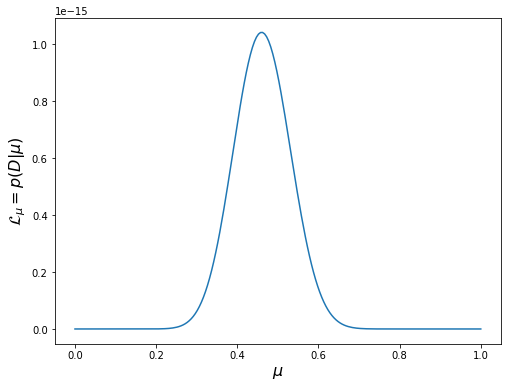

In [154]:
likelihood = np.prod(proba, axis=0)

#
plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood)
plt.xlabel('$\mu$', fontsize=16)
plt.ylabel('$\mathcal{L}_\mu = p(D | \mu)$', fontsize=16)

Fíjense que:

- la probabilidad es del orden de $1e^{-15}$, porque es la productoria de 50 números menores que 1.

- la función verosimilitud está centrada cerca del verdadero valor del parámetro $\mu$.

Podemos encontrar el valor de $\mu$ en el que se maximiza la verosimilitud (ya veremos que esto puede hacerse de forma analítica también).

In [155]:
print('El valor de $\mu$ que maximiza la verosimilitud es $\hat\mu$ '
      '= {:.2f}'.format(mu[np.argmax(likelihood)]))

El valor de $\mu$ que maximiza la verosimilitud es $\hat\mu$ = 0.46


Mirando la forma de la distribución de Bernouilli, se puede encontrar el máximo derivando con respecto a $\mu$ e igualando a cero. Eso da:

$$
\mu_\text{ML} = n_1 / N\;\;,
$$

donde $n_1$ es la cantidad de éxitos obtenidos en los datos, y $N$ es el número total de experimentos. $n_1$ se puede obtener sumando los datos, $n_1 = \sum_i x_i$. El cociente $n_1/N$ es lo que se conoce como un **estadístico suficiente**, es decir, que contiene toda la información sobre el problema en cuestión. 

Veamos si coincide

In [156]:
print('El valor de $\mu$ que maximiza la verosimilitud es $\hat\mu$ '
      '= {:.2f}'.format(np.sum(datos)/len(datos)))

El valor de $\mu$ que maximiza la verosimilitud es $\hat\mu$ = 0.46


Un análisis frecuentista terminaría acá, reportando el valor 0.46. En realidad, estoy siendo injusto. Se puede hacer bootstraping y un montón de cosas más.

Pero veamos cómo procede un análista bayesiano.

## Inferencia Bayesiana

El primer paso es asignar un prior al parámetro de interés, $\mu$. Esto representa la información con la que contamos acerca de este parámetro antes del análisis de los datos.

Podemos decir que no sabemos nada sobre $\mu$ antes del análisis, más allá de que debe estar en el intervalo $\[0, 1\]$. Una forma de representar esto es usar como prior una PDF uniforme con esos límites. Para que el prior esté normalizado, su valor debe ser $1/(b - a)$, donde $b$ y $a$ son los extremos superior e inferior, respectivamente. Es decir, 1, y 0.

In [157]:
prior = np.where((mu >= 0) * (mu <= 1), 1, 0)

Por la fórmula de Bayes, la posterior es proporcional al producto de verosimilitud y prior.

In [158]:
posterior_ = prior * likelihood

La constante de normalización es la evidencia. En este caso, la obtenemos numéricamente, sumando los elementos del posterior no normalizado (`posterior_`) y multiplicando por la distancia entre puntos.

Hacemos ese cálculo y graficamos prior y posterior juntos.

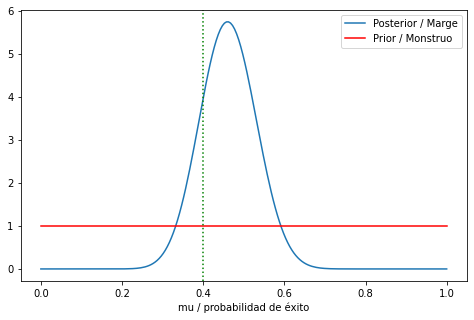

In [159]:
plt.figure(figsize=(8, 5))
plt.plot(mu, posterior_/ np.sum(posterior_ * np.diff(mu)[0]), label='Posterior / Marge')
plt.plot(mu, prior, color='r', label='Prior / Monstruo')
plt.legend(loc=0)
plt.xlabel('mu / probabilidad de éxito')

plt.axvline(0.4, color='g', ls=':', label='Ground truth')

Vemos cómo los datos hicieron que el prior poco informativo (monstruo en el meme) se convierta en una distribución picada mucho más informtiva (Marge en el meme), que contiene claramente al valor verdadero

***

Loa invitamos a jugar:

- Cambien el número de datos y vean cómo se modifica la posterior. ¿Qué esperan que ocurra para un número de datos muy elevados? ¿Cómo cambia la relación entre prior y posterior?

- Modifiquen el valor de mu_verdadero y vean que pasa con los datos y con la forma de la posterior. Sobre todo, prueben valores extremos de mu_verdadero.

**N.B.**: contar con la distribución posterior completa, permite calcular la posterior predictiva, que nos da una función de probabilidad para un futuro dato, $d'$ no observado (esto es "the ultimate power" del análisis bayesiano):

$$
p(d^\prime | D) = \int p(d^\prime, \mu | D) \mathrm{d}\mu = \int p(d^\prime | \mu, D) p(\mu | D) \mathrm{d}\mu 
$$